# Classification




# Overview

Classification belongs to the category supervised learning where we are given with target variable along with other feature(Predictors) attribute. Unlike regression problem, target variable for classifiaction problems does not have continuous values but classified into certain number of categories which we need to predict. Generally classifictaion problems are divided into two main categories:

Binary Classication Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.

Multiple classification problems: These problems can have multiple classifiers.

**Approach and Objective of the workbook:**

In this workbook, first we clean and preprocess the data and then perform visualizations using plots and graphs on the data to understand the trends, patterns and  to find the relationships among the features of in the data, before performing the regression. Then we apply four different classification algorithms and visualize the results. Following are the four algorithms that that will implemented in this workbook:

Pocket Algorithm.
Quadratic Discriminant Analysis (QDA).
Linear Discriminant Analysis (LDA).
Logistic Regression.

# Data

## Description

Data is the Mushroom Classification Dataset and is taken from Kaggle.This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Data Source:
G. H. Lincoff (Pres.), Alfred A. Knopf, Jeff Schlimmer (data donor), The Audubon Society Field Guide to North American Mushrooms (1981), https://www.kaggle.com/uciml/mushroom-classification

**Features of the data:**

Data contains the following variables

(classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Reading of the data

In [1]:
# Data read-in

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# Summary of the data
print(data.shape)

#Structure of the data
data.info()

# Description of the data
data.describe()

#Checking missing values in the data
data.isna().sum()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
#Identifying the numerical variables.

data.select_dtypes(include=[np.number]).columns


Index([], dtype='object')

In [4]:
#Identifying categorical values 

data.select_dtypes(exclude=np.number).columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## 	Plots for understanding or analysis

[Text(0, 0, 'Poisonous'), Text(0, 0, 'Edible')]

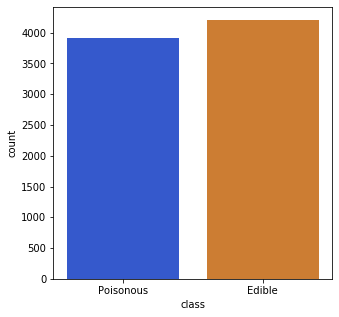

In [5]:
# Checking if the data is balanced on class

class_dict = ('Poisonous', 'Edible')
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot('class', hue=None, palette='bright', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(class_dict)


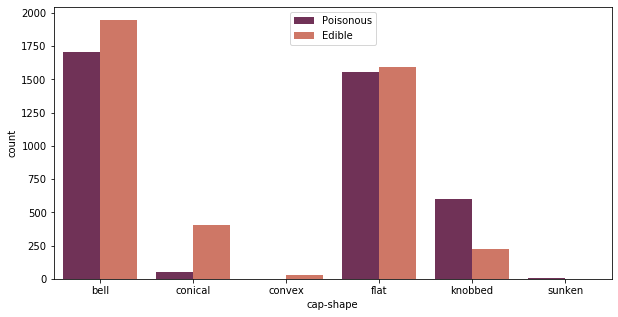

In [6]:
# Count plot on cap shape of the mushroom 

shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('cap-shape', hue='class', palette='rocket', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(shape_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


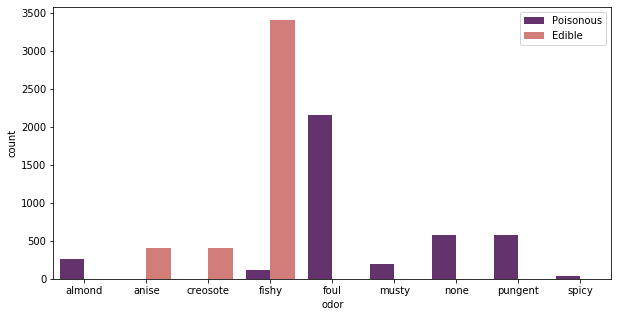

In [7]:
 # Count plot on odor of the mushroom 
    
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y","foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('odor', hue='class', palette='magma', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(odor_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


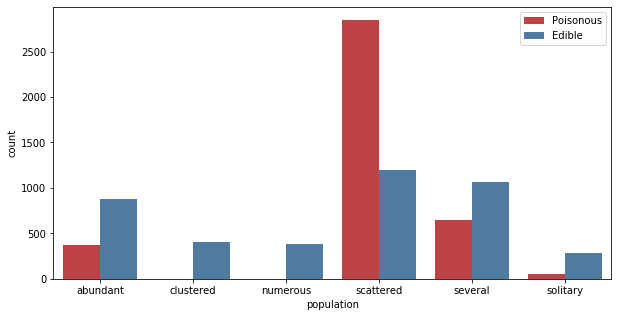

In [8]:
# Count plot on population 

population_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('population', hue='class', palette='Set1', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(population_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


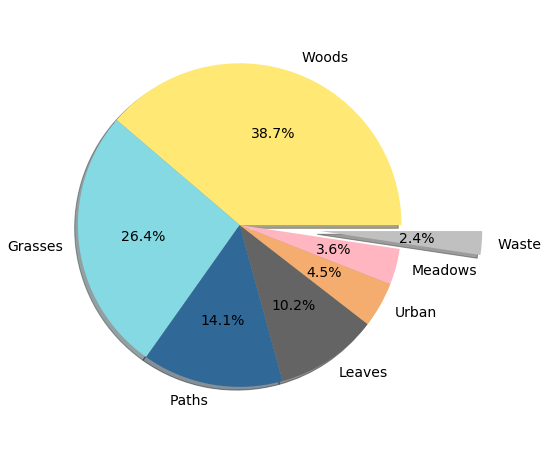

In [9]:
#To display habitat types and its values for a Single Pie chart

habitats = data['habitat'].value_counts()
habitat_size = habitats.values.tolist() #to provide numerical values
habitat_types = habitats.axes[0].tolist() #To convert index labels object to list

# Preparing data

habitat_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#FFE873','#84D9E2','#306998','#646464','#F5AD6F','#FFB6C1','#C0C0C0']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(8,8))

# Pie chart

size, texts, autotexts = plt.pie(habitat_size, explode=explode, labels=habitat_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

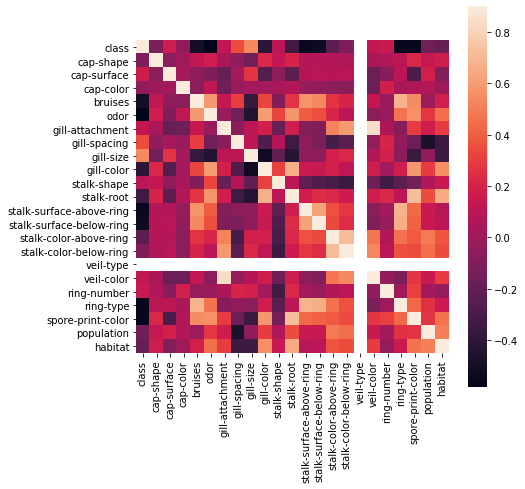

In [10]:
# Finding the correlation of the data using heat map
corr = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap = "rocket", vmax=0.9, square=True)

In [11]:
# Changing categorical variables into ordinal

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data_encoded=data.copy()
for column in data.columns:
    data_encoded[column] = labelencoder.fit_transform(data_encoded[column])
    

In [12]:
correlation = data_encoded.corr()

In [13]:
correlation['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

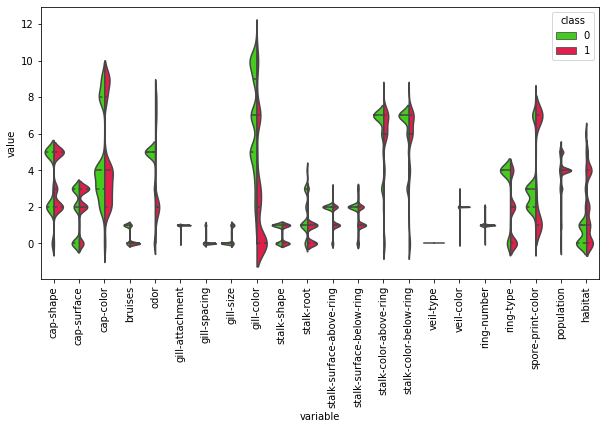

In [14]:
# To find the distribution of the data using violin plot

data_transpose = pd.melt(data_encoded, "class",var_name="variable")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="variable", y="value", hue="class", split = True, data=data_transpose, inner = 'quartile', palette = 'prism')
data_no_class = data.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));


## Preliminary Observations

There are 8124 instances and 23 features. There is not much preprocessing done as there are no missing values in the data. Plotted count plot for class variable and found that the data is balanced. Most of the mushrooms have a cap shape of bell shaped and flat. Mushrooms of fishy order are mostly edible. Most of the mushrooms with foul order are poisonous. Population of scattered mushrooms are poisonous. Most of the mushrooms are present in woods habitat. Correlation is found using heatmap and found many features which are highly correlated.Violin plot shows the distribution and probability distribution of the class over the other features of the dataset, cap-color seems to be balanced on the class.

There are no null values in our dataset. And no issues from the part of categorical attributes because the dataset is encoded and available in data_encoder. Normalization of the data will be handled during the implementation of each algorithm. So, there is no preprocessing done before the application of the algorithms.

# Method

## Summary of Classification models

The following four classification models are discussed in this workbook:

Pocket Algorithm

Quadratic Discriminant Analysis (QDA)

Linear Discriminant Analysis (LDA)

Logistic Regression

**Pocket Algorithm:** This algorithm introduced to overcome the drwaback of Perceptron algorithm. The perceptron algorithm applies step function on linear output of linear model. It update the weights, iterating over the whole trainig set. Error functionn is defined as:$$
E = \frac{1}{N}  \sum_{i=1}^N 1[sign(W^T X_i) \ne t_i]
$$The pocket algorithm keeps the best weights while iterating over whole trainig set and finally use that for prediction for best results


**Quadratic Discriminant Analysis (QDA):** This algorithm falls under the category of Geneartive Model which are pobabilistic unlike Pocket/ Perceptron algorithm. So they estimate joint probability for input X and target T which is calculated with the help of conditional probability andd is given by:

$$
P(X \mid T) = P(X \mid T)P(T) = P(T \mid X)P(X)
$$
$$
P(T \mid X) = \frac {P(X \mid T) P(T)} {P(X)}
$$
It is further calculated discriminant function based on certain assumptions like our data is equally sampled and most important that our data is Normally distributed.

$$
\delta_k (x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^T \vert \boldsymbol\Sigma_k       \vert^{-1} (x - \boldsymbol\mu_k) + \ln P(T = K)
$$
We calculate the discriminant for each classifier for our test set and finallly choose the maximum from all the discriminants we get at the end for each classifier.


**Linear Discriminant Analysis (LDA):** This algorithm is no different from QDA except on thing that unlike the QDA, it calclates the covariance matrix ($ \boldsymbol\Sigma $) only once while QDA calculates the covariance matrix for each classifier. It uses same covariances for all the classes. It is give by:$$
\delta_k(x) = x^T \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


**Logistic Regression:** It is considered as linear regression model that presdicts the probability of predicting each class for each sample. It does not predict directly the class label. In this case Target variable will be matrix of NK not the vector of size N. (N = Number of samples and K = Number of classes). Similarly the weight in this case will not be vector anymore but it would also be a matrix of (D+1)K (D+1 = Number of attributes in our dataset and +1 for bias).

So this algorithm calculates best weights by iterating over the dataset:

$$
w = w + \alpha X^T(T - g(X))
$$
where, $g(X)$ is calculated by softmax transformation which returns probabilities for each class and for each sample i.e matrix of N*K.

## Explanation of codes

**Pocket Algorithm:** Perceptron class is defined for this algorithm which is inheriting Classifier class. It contains 3 member variables:

• w - Which store the weights calculated for each sample.

• w_pocket - It will store the best weight till that particular iteration.

• alpha - It is our learning rate.

This class has 3 functions:

• train: It is iterating over all the training samples for any number of epochs to calculate the best weights for prediction.

• compare: This method is called from train method for each iteration to compare the weight calculated in that iteration and already stored weights(w_pocket).

• use: This function finally predicts the outcome from best stored weights(w-pocket) over all the iterations.

**Quadratic Discriminant Analysis (QDA):** For this algorithm QDA class is defined and it is also inheriting Classifier class. This algorithm contains 3 member variables for each class in our dataset.

• mu - Mean of particular class of training data.

• sigma - Covariance matrix for each class of training data.

• prior - Prior proabability for each class.

It also contains 3 methods:

• train: this method is calculating mu, sigma, prior for all the classes in our training dataset.

• use: This method is calculating probabilities for each class of our test dataset and storing in d1, d2 and so on.

• calculate_QDA: This is actual function which is calculating the proababilities on test set with calculated mu, sigma prior for each class. It is called from the use method for number of classes we have.

**Linear Discriminant Analysis (LDA):** For this algorithm LDA class is defined and it is also inheriting Classifier class. This algorithm contains 2 member variables for each class in our dataset and only sigma for all the classes.

• mu - Mean of particular class of training data.

• sigma - Covariance matrix for complete training data which is ised for all the classes.

• prior - Prior proabability for each class.

It also contains 3 methods:

• train: this method is calculating mu, prior for all the classes and sigma only once and use that for all the classes in our training dataset.

• use: This method is calculating probabilities for each class of our test dataset and storing in d1, d2 and so on.

• calculate_LDA: This is actual function which is calculating the proababilities on test set with calculated mu, prior for each class and same sigma for all the classes. It is called from the use method for number of classes we have.

**Logistic Regression:** Logistic is the class defined for this algorithm which is inheriting Classifier class. It contains 2 member variables:

• w - Which store the weights calculated for each sample.

• alpha - It is our learning rate.

This class also has 3 functions:

• train: It is iterating over number of times to calculate the best weights for prediction.

• softmax: This method is calclating the probabilities using softmax function.

• use: This function finally predicts the probabilities of each class for each test sample with from best calculated weights.


## Pocket, LDA, QDA, Logistic Regression

### Splitting the test and train datasets

In [15]:
from sklearn.model_selection import train_test_split
def partition(X, T):
    return train_test_split(X, T, test_size = .2)

## A. Super Class Definition

In [16]:

import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        
        Xs = (X - self.meanX) / self.stdX 
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

## B. Pocket Algorithm

In [17]:
from copy import deepcopy as copy

class Perceptron(Classifier):
    
    def __init__(self, alpha):
        self.w = None
        self.w_pocket = None
        self.alpha = alpha
        
    def compare(self, X1, T, w, w_pocket):
        y = np.sign(X1 @ w)
        y_pocket = np.sign(X1 @ w_pocket)
        
        return 1 if(np.sum(y == T) > np.sum(y_pocket == T)) else -1
        
    def train(self, X, T):
        maxiter = 1
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = copy(self.w)
        
        for i in range(maxiter):
            converge = True
            for j in range(X.shape[0]):
                y = X1[j] @ self.w
                if(np.sign(y) != np.sign(T[j])):
                    self.w += self.alpha * X1[j] *T[j]
                    converge = False
                    
                    if(self.compare(X1, T, self.w, self.w_pocket) > 0):
                        self.w_pocket[:] = self.w[:]
            
            if converge:
                break
                
    def use(self, X):
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        return X1 @ self.w_pocket

#### Creating the labels for classification as -1 and 1

In [18]:
data_binary = data_encoded.copy()
data_binary['class']=data_binary['class'].replace(0, -1)
print(data_binary['class'].value_counts())
print(data_binary.shape)

-1    4208
 1    3916
Name: class, dtype: int64
(8124, 23)


#### Creating independent and dependent variables for pocket algorithm

In [19]:
X_pocket=data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color' ], axis=1).values
T_pocket=data_binary['class'].values
print("Shape of the X_pocket{}, T_pocket{}"
      .format(X_pocket.shape,T_pocket.shape))

Shape of the X_pocket(8124, 14), T_pocket(8124,)


X_pocket contains independent variables with correlation above + 0.15 and below -0.15 and T_pocket contains dependent variable 'class'

#### Partitioning the test and train datasets for pocket algorithm

In [20]:
X_train_pocket, X_test_pocket, T_train_pocket, T_test_pocket = partition(X_pocket, T_pocket)
print("Shape of the X_train_pocket{}, X_test_pocket{}, T_train_pocket{}, T_test_pocket{}"
      .format(X_train_pocket.shape, X_test_pocket.shape, T_train_pocket.shape, T_test_pocket.shape))

Shape of the X_train_pocket(6499, 14), X_test_pocket(1625, 14), T_train_pocket(6499,), T_test_pocket(1625,)


In [21]:
perceptron = Perceptron(.2)
perceptron.train(X_train_pocket, T_train_pocket)
y_pred = perceptron.use(X_test_pocket)
y_pred_pocket = np.where(y_pred < 0, -1, 1)

## C. Quadratic Discriminant Analysis (QDA)

In [22]:
class QDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.sigma1 = None
        self.prior1 = None
      
        self.mu2 = None
        self.sigma2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.sigma1 = np.cov(Xs[:N1].T)
        self.prior1 = N1 / N
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.sigma2 = np.cov(Xs[N1:].T)
        self.prior2 = N2 / N
        
    def calculate_QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mu
        
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        Xs = self.normalize(X)
        d1 = self.calculate_QDA(Xs, self.mu1, self.sigma1, self.prior1)
        d2 = self.calculate_QDA(Xs, self.mu2, self.sigma2, self.prior2)
        return d1 , d2

#### Creating independent and dependent variables for QDA

In [23]:
X_qda=data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color' ], axis=1)
T_qda=data_binary['class']

X_qda contains independent variables with correlation above + 0.15 and below -0.15 and T_qda contains dependent variable 'class'

#### Partitioning the test and train datasets for QDA

In [24]:
X_train_qda, X_test_qda, T_train_qda, T_test_qda = partition(X_qda, T_qda)

print("Shape of X_train_qda{}, X_test_qda{}, T_train_qda{}, T_test_qda{}"
      .format(X_train_qda.shape, X_test_qda.shape, T_train_qda.shape, T_test_qda.shape))

Shape of X_train_qda(6499, 14), X_test_qda(1625, 14), T_train_qda(6499,), T_test_qda(1625,)


Combining the X_train_qda and T_train_qda as XT_train_qda, so that we can separate the training data according to positive and negative classifier.

In [25]:
XT_train_qda = pd.concat([X_train_qda, T_train_qda], axis=1)
print("Shape of XT_train_qda", XT_train_qda.shape)

Shape of XT_train_qda (6499, 15)


Sorting the XT_train_qda according to the classifier for training.

In [26]:
XT_train_qda= XT_train_qda.sort_values(by=['class'])
XT_train_qda.groupby('class').size()

class
-1    3359
 1    3140
dtype: int64

Calculating the total number of negative classifier(N1) and positive classifier(N2).

In [27]:
N1 = XT_train_qda.loc[XT_train_qda['class'] == -1, 'class'].count() 
N2 = XT_train_qda.loc[XT_train_qda['class'] == 1, 'class'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))
XT_train_qda.shape

Values of N1 3359, N2 3140 and N 6499


(6499, 15)

In [28]:
XT_train_qda = XT_train_qda.values
X_test_qda = X_test_qda.values
T_train_qda = T_train_qda.values
T_test_qda = T_test_qda.values

In [29]:
qda = QDA()
qda.train(XT_train_qda[:,:-1], N1, N2)
d1_qda, d2_qda = qda.use(X_test_qda)
d3_qda = np.argmax((d1_qda, d2_qda), axis=0)
d3_qda
y_pred_qda = np.where(d3_qda == 0, -1, 1)

## D. Linear Discriminant Analysis (LDA)

In [30]:
class LDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.prior1 = None
        
        self.sigma = None
        
        self.mu2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.prior1 = N1 / N
        
        self.sigma = np.cov(Xs.T)
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.prior2 = N2 / N
        
    def calculate_LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mu
        
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        d1 = self.calculate_LDA(X, self.mu1, self.sigma, self.prior1)
        d2 = self.calculate_LDA(X, self.mu2, self.sigma, self.prior2)
        return d1, d2

#### Creating independent and dependent variables for LDA

In [31]:
X_lda=data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color','spore-print-color','cap-surface','ring-number','gill-spacing'], axis=1)
T_lda=data_binary['class']

X_lda contains independent variables with correlation above + 0.15 and below -0.15 and T_lda contains dependent variable 'class'

#### Partitioning the test and train datasets for LDA

In [32]:
X_train_lda, X_test_lda, T_train_lda, T_test_lda = partition(X_lda, T_lda)

print("Shape of X_train_lda{}, X_test_lda{}, T_train_lda{}, T_test_lda{}"
      .format(X_train_lda.shape, X_test_lda.shape, T_train_lda.shape, T_test_lda.shape))

Shape of X_train_lda(6499, 10), X_test_lda(1625, 10), T_train_lda(6499,), T_test_lda(1625,)


Combining the X_train_lda and T_train_lda as XT_train_lda, so that we can separate the training data according to positive and negative classifier.

In [33]:
XT_train_lda = pd.concat([X_train_lda, T_train_lda], axis=1)
print("Shape of XT_train_lda", XT_train_lda.shape)

Shape of XT_train_lda (6499, 11)


Sorting the XT_train_qda according to the classifier for training.

In [34]:
XT_train_lda = XT_train_lda.sort_values(by=['class'])
XT_train_lda.groupby('class').size()

class
-1    3329
 1    3170
dtype: int64

In [35]:
N1 = XT_train_lda.loc[XT_train_lda['class'] == -1, 'class'].count() 
N2 = XT_train_lda.loc[XT_train_lda['class'] == 1, 'class'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))
XT_train_lda.shape

Values of N1 3329, N2 3170 and N 6499


(6499, 11)

In [36]:
XT_train_lda = XT_train_lda.values
X_test_lda = X_test_lda.values
T_train_lda = T_train_lda.values
T_test_lda = T_test_lda.values

In [37]:
lda = LDA()
lda.train(XT_train_lda[:,:-1], N1, N2)
d1, d2 = lda.use(X_test_lda)

d3_lda = np.argmax((d1, d2), axis=0)
y_pred_lda = np.where(d3_lda == 0, -1, 1)

## Logistic Regression

In [38]:
class Logistic(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)
    
    def g(self, X, w):
        return self.softmax( X @ w )
    
    def train(self, X, T):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        
        D = X1.shape[1]
        K = T.shape[1]
        
        max_iter = 10
        self.w = np.zeros((D,K))
        
        for i in range(max_iter):
            y = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T - y)
            
    def use(self, X):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        y = self.g(X1, self.w)
        y_pred = np.argmax(y, axis = 1)
        return y_pred

In [39]:
X_logistic = data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color' ], axis=1)
T_logistic = data_binary['class']
print("Shapes of X_logistic{} and T_logistic{}".format(X_logistic.shape, T_logistic.shape))

Shapes of X_logistic(8124, 14) and T_logistic(8124,)


X_logistic contains independent variables with correlation above + 0.15 and below -0.15 and T_logistic contains dependent variable 'class'

#### Partitioning the test and train datasets for Logistic Regression

In [40]:
X_train_logistic, X_test_logistic, T_train_logistic, T_test_logistic = partition(X_logistic, T_logistic)

print("Shape of X_train_logistic{}, X_test_logistic{}, T_train_logistic{}, T_test_logistic{}"
      .format(X_train_logistic.shape, X_test_logistic.shape, T_train_logistic.shape, T_test_logistic.shape))

Shape of X_train_logistic(6499, 14), X_test_logistic(1625, 14), T_train_logistic(6499,), T_test_logistic(1625,)


#### Resetting the index for the train and test datasets before performing logistic regression

In [41]:
X_train_logistic = X_train_logistic.reset_index(drop=True)
X_test_logistic = X_test_logistic.reset_index(drop=True)
T_train_logistic = T_train_logistic.reset_index(drop=True)
T_test_logistic = T_test_logistic.reset_index(drop=True)

#### Converting test vector to N*K matrix (K = Number of classifiers)


In [42]:
T_train_logistic1 = pd.get_dummies(T_train_logistic)
print("Shape of T_train_logistic1",T_train_logistic1.shape)

Shape of T_train_logistic1 (6499, 2)


In [43]:
X_train_logistic = X_train_logistic.values
X_test_logistic = X_test_logistic.values
T_train_logistic1 = T_train_logistic1.values
T_test_logistic = T_test_logistic.values

 Converting all -1 values with '0', so that we can easily compare predictions of logistic regressions.

In [44]:
T_test_logistic1 = np.where(T_test_logistic == -1, 0,1)

In [45]:
logistic = Logistic(.005)
logistic.train(X_train_logistic, T_train_logistic1)
y_pred_logistic = logistic.use(X_test_logistic)

# Experiments

## Evaluation Metrics

First we preprocess the data and then apply different classification algorithms. Then we calculate the metrics and visualize the performance of the models. In Machine Learning, there are various methods for performance evaluation for different models. For Classification models, we will calculate Precision, Recall, Area Under the Curve, Accuracy for performace metrics.

**Confusion Matrix:** This metric is used for both binary as well as Multiple classification problems. The four terms are related to this metric:

i) True Positives(TP): Case where actual class of data are True and predicted class is also True.

ii) True Negatives(TN): Case where actual class of data are False, the predicted class is also False.

iii) False Positives(FP): Case where the actual class of data are False and the predicted class is True.

iv) False Negatives(FN): Case where the actual class of data are True and the predicted class is False.


**Accuracy:** It is the number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$
It should not be used when majority of target variable in our dataset are of single class.


**Precision:** It just tells us that how accurate our predictions are.$$
Precision = \frac {TP} {TP + FP} 
$$


**Recall:** Recall tells us about the actual positives.$$
Recall = \frac {TP} {TP + FN} 
$$


**F1 Score:** While calculating performance metrics, we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.

$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$


## Train and test accuracies

**Train accuracy:** The accuracy of a model on the data it was constructed on. 

**Test accuracy:** It is the accuracy of a model on the data it hasn't seen.

Calculating these train and test accuracies is important as the difference between them will let us know if the model is overfitting

### Pocket Algorithm

In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score
confusion_matrix(T_test_pocket, y_pred_pocket)

array([[793,  55],
       [ 41, 736]])

In [47]:
precision_pocket = precision_score(T_test_pocket, y_pred_pocket)
recall_pocket = recall_score(T_test_pocket, y_pred_pocket)
f1_pocket = f1_score(T_test_pocket, y_pred_pocket)
accuracy_pocket = accuracy_score(T_test_pocket, y_pred_pocket)
print("Calculated scores for Pocket Algorithm:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_pocket, recall_pocket, f1_pocket, accuracy_pocket))

Calculated scores for Pocket Algorithm:
Precision: 0.9304677623261695, Recall: 0.9472329472329473, F1: 0.9387755102040817, Accuracy: 0.940923076923077


### QDA

In [48]:
confusion_matrix(T_test_qda, y_pred_qda)

array([[845,   4],
       [ 40, 736]])

In [49]:
precision_qda = precision_score(T_test_qda, y_pred_qda)
recall_qda = recall_score(T_test_qda, y_pred_qda)
f1_qda = f1_score(T_test_qda, y_pred_qda)
accuracy_qda = accuracy_score(T_test_qda, y_pred_qda)
print("Calculated scores for QDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_qda, recall_qda, f1_qda, accuracy_qda))

Calculated scores for QDA:
Precision: 0.9945945945945946, Recall: 0.9484536082474226, F1: 0.9709762532981531, Accuracy: 0.9729230769230769


### LDA

In [50]:
confusion_matrix(T_test_lda, y_pred_lda)

array([[878,   1],
       [629, 117]])

In [51]:
precision_lda = precision_score(T_test_lda, y_pred_lda)
recall_lda = recall_score(T_test_lda, y_pred_lda)
f1_lda = f1_score(T_test_lda, y_pred_lda)
accuracy_lda = accuracy_score(T_test_lda, y_pred_lda)
print("Calculated scores for LDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_lda, recall_lda, f1_lda, accuracy_lda))

Calculated scores for LDA:
Precision: 0.9915254237288136, Recall: 0.15683646112600536, F1: 0.2708333333333333, Accuracy: 0.6123076923076923


### Logistic Regression

In [52]:
confusion_matrix(T_test_logistic1, y_pred_logistic)

array([[736, 111],
       [161, 617]])

In [53]:
precision_logistic = precision_score(T_test_logistic1, y_pred_logistic)
recall_logistic = recall_score(T_test_logistic1, y_pred_logistic)
f1_logistic = f1_score(T_test_logistic1, y_pred_logistic)
accuracy_logistic = accuracy_score(T_test_logistic1, y_pred_logistic)
print("Calculated scores for Logistic:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

Calculated scores for Logistic:
Precision: 0.8475274725274725, Recall: 0.7930591259640103, F1: 0.8193891102257636, Accuracy: 0.8326153846153846


## Plots

### Pocket Algorithm

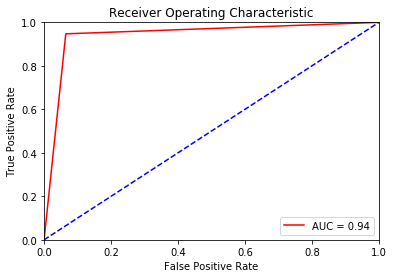

In [54]:
from sklearn.metrics import roc_curve
fpr_pocket, tpr_pocket, threshold_pocket = roc_curve(T_test_pocket, y_pred_pocket)
roc_auc_pocket = auc(fpr_pocket, tpr_pocket)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_pocket, tpr_pocket, 'r', label = 'AUC = %0.2f' % roc_auc_pocket)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

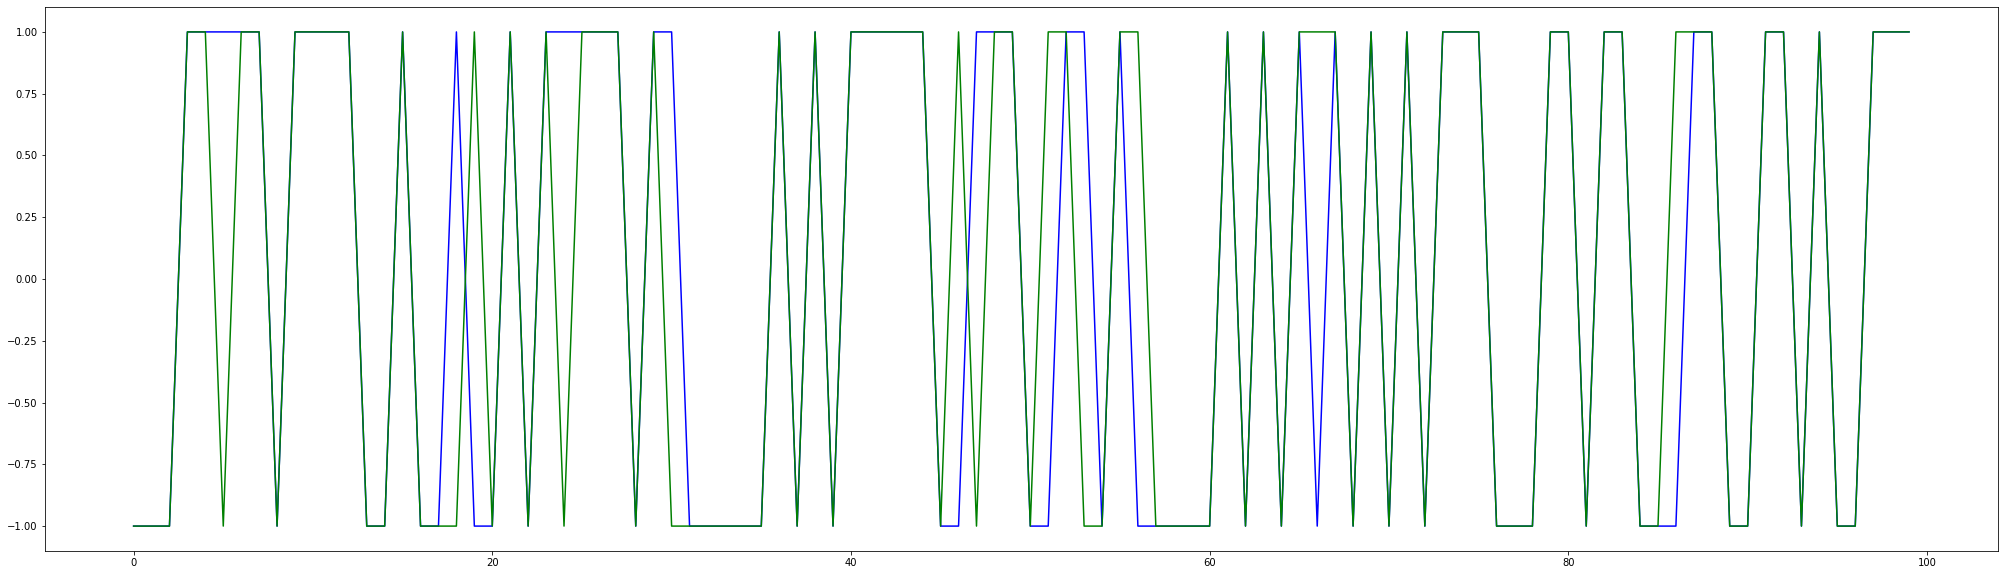

In [55]:
plt.figure(figsize=(35,10))
plt.plot(T_test_pocket[:100],'b')
plt.plot(y_pred_pocket[:100],'g')

### QDA

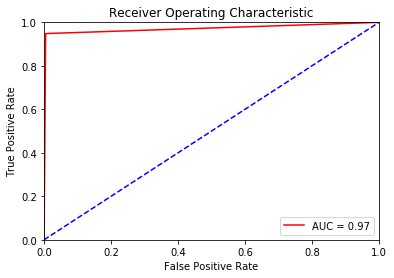

In [56]:
from sklearn.metrics import roc_curve
fpr_qda, tpr_qda, threshold_qda = roc_curve(T_test_qda, y_pred_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_qda, tpr_qda, 'r', label = 'AUC = %0.2f' % roc_auc_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

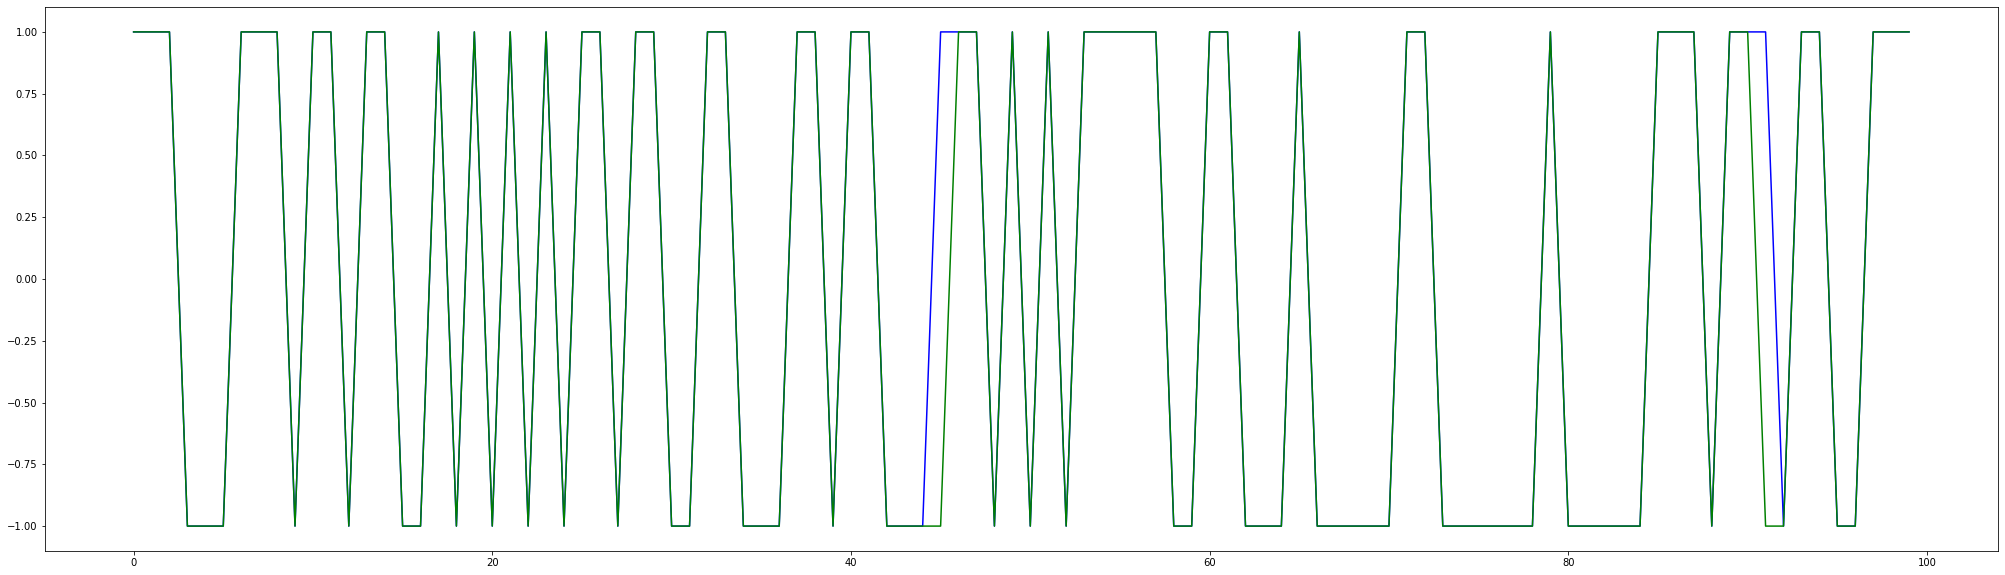

In [57]:
plt.figure(figsize=(35,10))
plt.plot(T_test_qda[:100],'b')
plt.plot(y_pred_qda[:100],'g')

### LDA

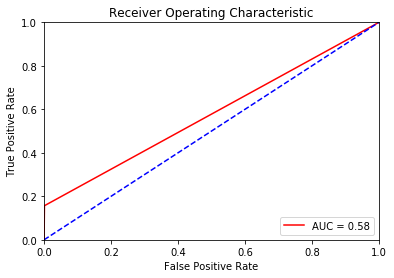

In [58]:
fpr_lda, tpr_lda, threshold_lda = roc_curve(T_test_lda, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'r', label = 'AUC = %0.2f' % roc_auc_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

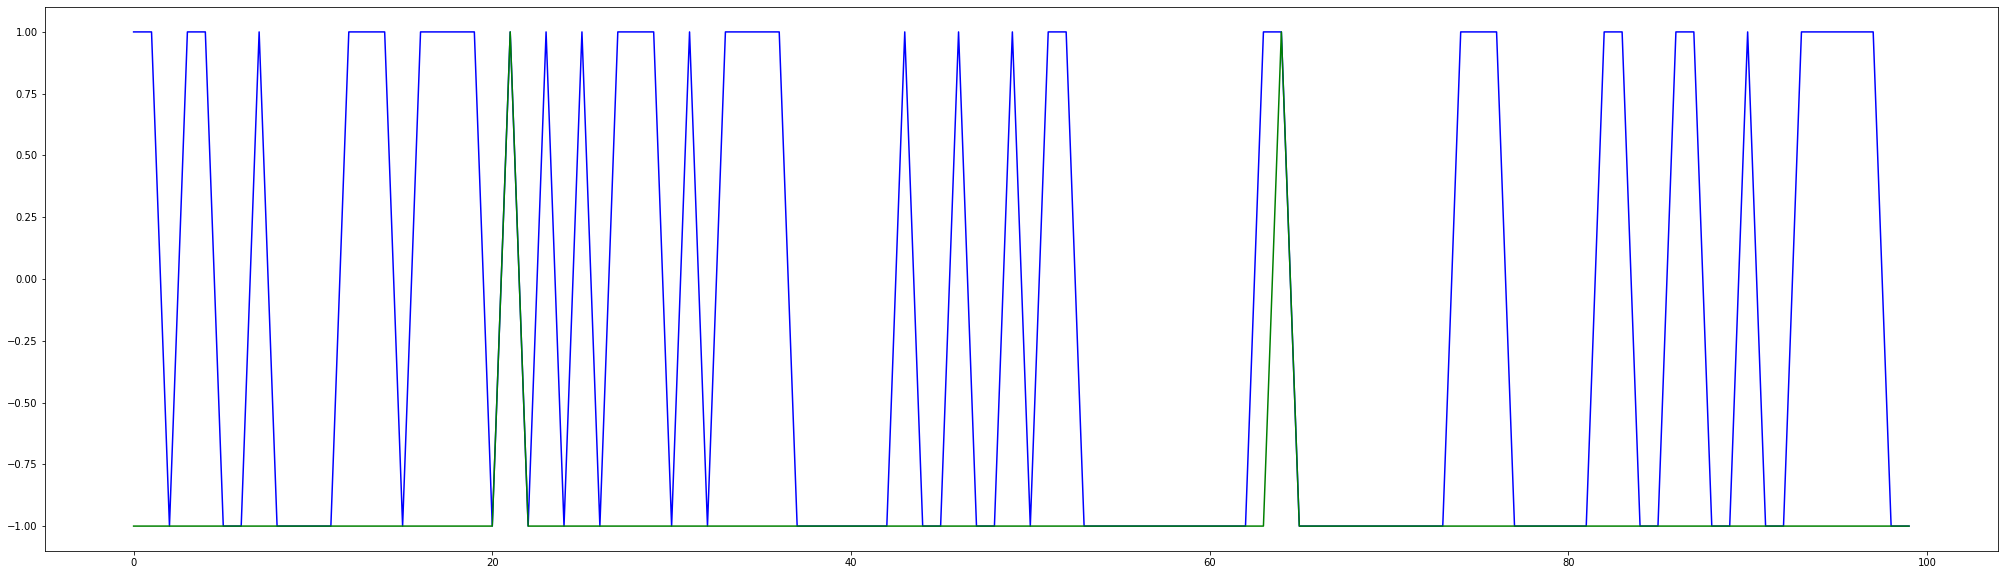

In [59]:
plt.figure(figsize=(35,10))
plt.plot(T_test_lda[:100],'b')
plt.plot(y_pred_lda[:100],'g')

### Logistic Regression

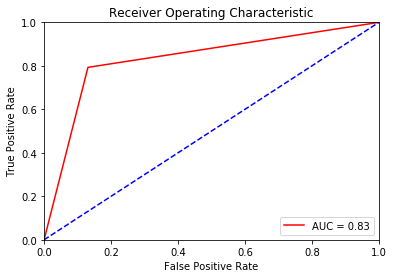

In [60]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(T_test_logistic1, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logistic, tpr_logistic, 'r', label = 'AUC = %0.2f' % roc_auc_logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

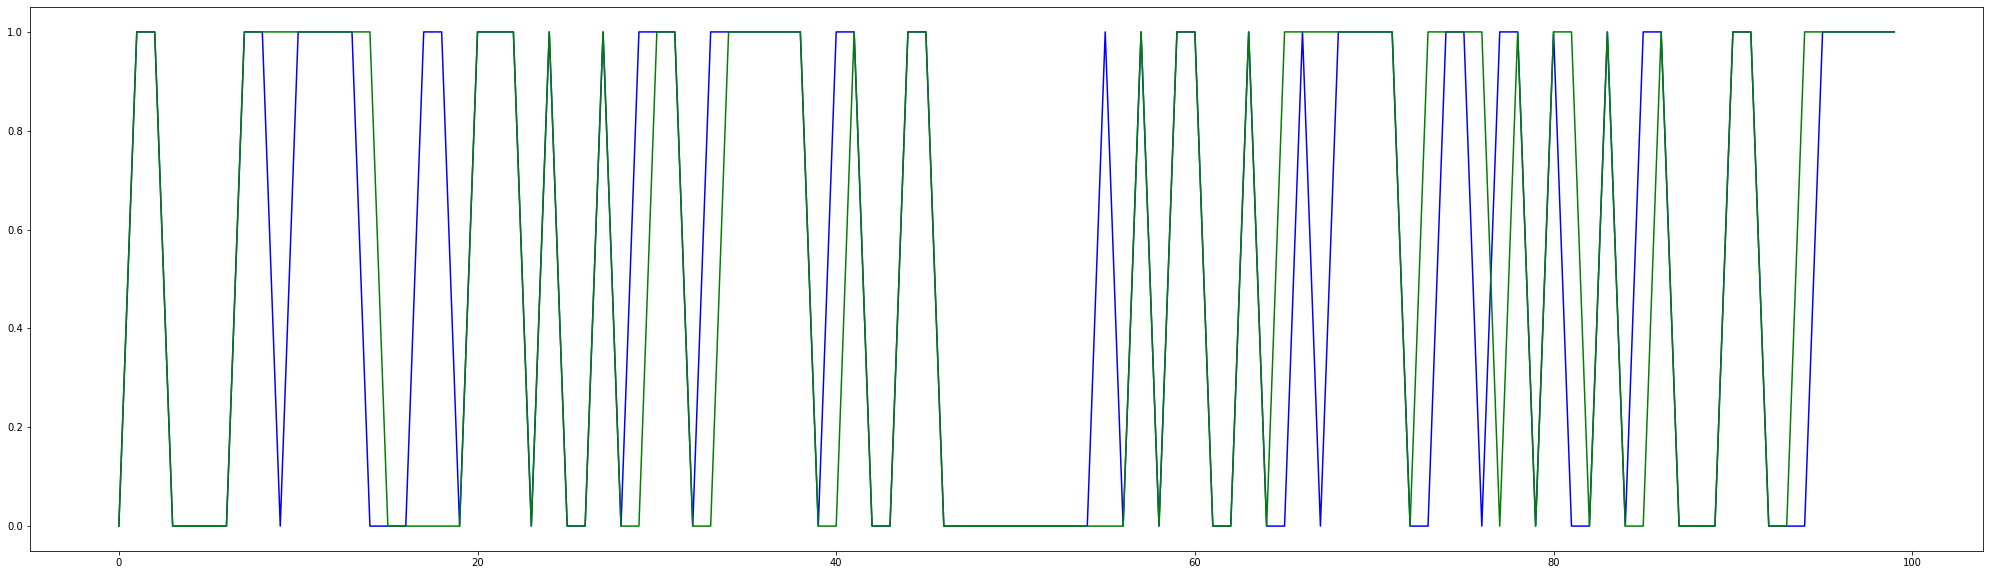

In [61]:
plt.figure(figsize=(35,10))
plt.plot(T_test_logistic1[:100],'b')
plt.plot(y_pred_logistic[:100],'g')

### Observations

For plotting the classification algorithms, we have created two types of plots for each algorithm i.e ROC curve and  comparison between actual test data and predicted values by simple plotting of data points. For the comparison of actual and predicted values, I have considered the first 100 data points to visualize instead of all the test data points as it will give a clear idea of compared values. For the line graphs plotted for all the algorithms, the blue lines represent actual test set while green line represents the predicted values.

## Comparison of different Classification Models 

We are comparing the classification models based of different parameters considered and the plots above. We have calculated confusion matrix and the four different parameters for evaluation metrics i.e Precision, Recall, F1 score and Accuracy. We summarize performance of each algorithm on all of the calculated performance metrics. Based on these metrics, we can easily infer which classification model is doing better in terms of metrics.

**ROC Curve:** This curve is one of performance evaluation metric for the binary classification problems. It is plotted against True Postive Rates(TPR) vs False Positive Rate(FPR). ROC is the proabability curve and AUC represents the are under the curve. More the probability or more our ROC curve towards TPR implies more would be area under the curve and more the is correctly predicting the classes.So comparing the four algorithms on the basis of ROC curve. Linear Discriminant Analysis (LDA) is performing quite low as it is having less AUC of 0.58. Logistic Regression has next lowest AUC of 0.83. While other two algorithms, Pocket algorithm and QDA are performing quite better than the earlier ones with AUC scores above 0.9.

**Precision:** QDA and LDA has highest precision (close to 0.99) when compared to other two classification models. Logistic Regression(0.85) has the lowest precision value among all of them and Pocket Algorithm has the next higher precision (0.93).

**Recall:** In the case of Recall the trend changes slightly from above two performance metrics. Recall is highest for Pocket Algorithm(0.95) and QDA(0.95) followed by logistic regression and then LDA. LDA has lowest recall of 0.16.

**F1 Score:** Basically, this is most important metric for the evaluation of a classification model. This metric is similar to Recall, Pocket Algorithm (0.94) and QDA (0.97), followed by Logistic regression with a value of 0.82 and the LDA's F1 score (0.27) is quite low.

**Accuracy:** Similar is the case with accuracy, QDA and Pocket Algorithm has higher accuracy followed by Logistic Regression. LDA has lowest accuracy of 61%

So based on the above metrics, we can clearly interpret that on the data considered, Pocket Algorithm and QDA algorithm is performing well as comapred to other two algorithms. This is because of the higher F1 score and Recall values of these classification models.

# Conclusions

In this notebook, we have learnt and implemented four different classification algorithms Pocket algorithm, Quadratic Discriminant Analysis(QDA),Linear Discriminant Analysis(LDA),Logistic Regression on 'Mushroom' dataset. This was binary class dataset showing if the mushroom is edible or poisonous. We altered the data we have converted this binary-class categorical values to binary numerical values by encoding the data for better understanding. Also, the Pocket algorithm is binary classification algorithm.

There is not much preprocessing done as there are no missing values in the data. Plotted count plot for class variable and found that the data is balanced. Most of the mushrooms have a cap shape of bell shaped and flat. Mushrooms of fishy order are mostly edible. Most of the mushrooms with foul order are poisonous. Population of scattered mushrooms are poisonous. Most of the mushrooms are present in woods habitat. Correlation is found using heatmap and found many features which are highly correlated. Violin plot showed the distribution and probability distribution of the class over the other features of the dataset, cap-color seems to be balanced on the class. 

We have encoded the data and performed the correlation to know the relation of the features of the data with the class. We analyzed the data through the visualizations decribed above and it helped in the better understanding the of the data attributes. We have chose few attributes with high correlation on the basis of correlation matrix with respect to class, otherwise the models were not able to predict the class.

Based on our evaluation metrics and ROC-AUC curve plotted above, it clearly depicts that Mushroom Classification data is well balanced and the two classification models Pocket Algorithm and Quadratic Discriminant Analysis(QDA) worked very well as they have very high Recall and F1 score along with above 90% accuracy.Logistic Regression also worked well with 83% accuracy however, Logistic Discriminant Analysis(LDA) did not perform well on the dataset as they have very low accuracy (61% approx).

# References



G. H. Lincoff (Pres.), Alfred A. Knopf, Jeff Schlimmer (data donor), The Audubon Society Field Guide to North American Mushrooms (1981), https://www.kaggle.com/uciml/mushroom-classification

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Bengfort, B., Bilbro, R., Danielsen, N., Gray, L., & others. (2018). Yellowbrick. doi:10.
5281/zenodo.1206239, https://www.scikit-yb.org/en/latest/about.html

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017

# Extra Analysis

**Option 2:** Partitioning the data into five sets using KFold. Selecting one test set and the other for training, repeating the experiments and analyzing the five different training/testing errors

In [62]:
from sklearn.model_selection import KFold

In [63]:
data_binary.shape

(8124, 23)

In [64]:
X1 = data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color','spore-print-color','cap-surface','ring-number','gill-spacing'], axis=1)
y1 = data_binary['class']
print("Shape of X1: {} and y1: {}".format(X1.shape, y1.shape))

Shape of X1: (8124, 10) and y1: (8124,)


In [65]:
def calculate_performance(y_test, y_pred):
    precision_logistic = precision_score(y_test, y_pred)
    recall_logistic = recall_score(y_test, y_pred)
    f1_logistic = f1_score(y_test, y_pred)
    accuracy_logistic = accuracy_score(y_test, y_pred)
    print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

## Pocket Algorithm

In [66]:
pocket_cv = Perceptron(.00003)

In [67]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index].values, X1.iloc[test_index].values
    y_train, y_test = y1.iloc[train_index].values, y1.iloc[test_index].values

    pocket_cv.train(X_train, y_train)
    y_pred = pocket_cv.use(X_test)

    y_pred_pocket = np.where(y_pred < 0, -1, 1)
        
    calculate_performance(y_test, y_pred_pocket)

Precision: 0.2536136662286465, Recall: 1.0, F1: 0.4046121593291404, Accuracy: 0.6504615384615384
Precision: 0.41284403669724773, Recall: 0.7297297297297297, F1: 0.52734375, Accuracy: 0.8510769230769231
Precision: 1.0, Recall: 0.36380597014925375, F1: 0.533515731874145, Accuracy: 0.5803076923076923
Precision: 0.939615736505032, Recall: 0.7613046701260193, F1: 0.8411138411138411, Accuracy: 0.7612307692307693
Precision: 1.0, Recall: 0.918531781557744, F1: 0.9575361642557162, Accuracy: 0.9439655172413793


For the Pocket algorithm, using Kfold and splitting the data into five sets, results are similar to that of considering one set of data. It might give better results if it runs on more number of iterations.

## QDA

In [68]:
QDA_cv = QDA()

In [69]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train1 = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    QDA_cv.train(X_train1, N1, N2)
    d1, d2 = QDA_cv.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calculate_performance(y_test, y_pred_qda)

Precision: 0.30109204368174725, Recall: 1.0, F1: 0.46282973621103113, Accuracy: 0.7243076923076923
Precision: 0.4114114114114114, Recall: 0.7405405405405405, F1: 0.528957528957529, Accuracy: 0.8498461538461538
Precision: 1.0, Recall: 0.16511194029850745, F1: 0.28342674139311447, Accuracy: 0.4492307692307692
Precision: 0.9915433403805497, Recall: 0.6953298739807264, F1: 0.8174291938997822, Accuracy: 0.7421538461538462
Precision: 0.7316076294277929, Recall: 0.9615040286481648, F1: 0.8309477756286267, Accuracy: 0.7309113300492611


In case of QDA, using Kfold and splitting the data into five sets, few metrics are similar to that of considering one set of data, however accuracy decreased.

## LDA

In [70]:
LDA_cv = LDA()

In [71]:
kf_lda = KFold(n_splits=5)
scores = []
for train_index, test_index in kf_lda.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train_new = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    X_train_new = X_train_new.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    LDA_cv.train(X_train_new, N1, N2)
    d1, d2 = LDA_cv.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calculate_performance(y_test, y_pred_qda)

Precision: 0.3811659192825112, Recall: 0.44041450777202074, F1: 0.4086538461538462, Accuracy: 0.8486153846153847
Precision: 1.0, Recall: 0.15675675675675677, F1: 0.2710280373831776, Accuracy: 0.904
Precision: 1.0, Recall: 0.07462686567164178, F1: 0.13888888888888887, Accuracy: 0.38953846153846156
Precision: 1.0, Recall: 0.04744255003706449, F1: 0.0905874026893135, Accuracy: 0.20923076923076922
Precision: 0.5816135084427767, Recall: 0.2775290957923008, F1: 0.37575757575757573, Accuracy: 0.3657635467980296


In case of LDA, using Kfold and splitting the data into five sets, few metrics are similar to that of considering one set of data, however accuracy increased in the first set.

## Logistic Regression

In [72]:
logistic_cv = Logistic(.0000000003)

In [73]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    y_train1 = pd.get_dummies(y_train)
    y_test1 = np.where(y_test == -1, 0,1)
    
    logistic_cv.train(X_train, y_train1.values)
    y_pred_logistic = logistic_cv.use(X_test)
    
    calculate_performance(y_test1, y_pred_logistic)

Precision: 0.15113350125944586, Recall: 0.6217616580310881, F1: 0.24316109422492402, Accuracy: 0.5403076923076923
Precision: 0.2586989409984871, Recall: 0.9243243243243243, F1: 0.40425531914893614, Accuracy: 0.6898461538461539
Precision: 0.9647404505386875, Recall: 0.9188432835820896, F1: 0.9412326803631151, Accuracy: 0.9243076923076923
Precision: 0.9083969465648855, Recall: 0.5292809488510007, F1: 0.6688524590163935, Accuracy: 0.564923076923077
Precision: 1.0, Recall: 0.918531781557744, F1: 0.9575361642557162, Accuracy: 0.9439655172413793


For the Logistic Regression, using Kfold and splitting the data into five sets, few metrics are similar to that of considering one set of data, however accuracy increased in the last set of data.